In [39]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [40]:
from tensorflow.keras.datasets import cifar10

In [14]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 783s 5us/step


In [15]:
x_train = (x_train)/255
x_test = (x_test)/255

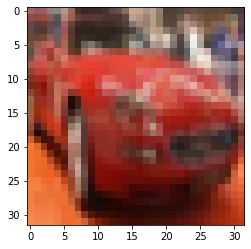

In [41]:
plt.imshow(x_train[5])

In [42]:
x_test.shape

(10000, 32, 32, 3)

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
y_cat_train = to_categorical(y_train,10)

In [45]:
y_cat_test = to_categorical(y_test,10)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D ,Flatten

In [47]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [48]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping( monitor='val_loss',patience=2)

In [50]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop] )

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 25s 491us/sample - loss: 1.5143 - accuracy: 0.4587 - val_loss: 1.4180 - val_accuracy: 0.4849
Epoch 2/15
50000/50000 [==============================] - 24s 476us/sample - loss: 1.1585 - accuracy: 0.5948 - val_loss: 1.2118 - val_accuracy: 0.5720
Epoch 3/15
50000/50000 [==============================] - 24s 486us/sample - loss: 1.0091 - accuracy: 0.6517 - val_loss: 1.1305 - val_accuracy: 0.6089
Epoch 4/15
50000/50000 [==============================] - 24s 479us/sample - loss: 0.9072 - accuracy: 0.6878 - val_loss: 0.9675 - val_accuracy: 0.6754
Epoch 5/15
50000/50000 [==============================] - 24s 487us/sample - loss: 0.8277 - accuracy: 0.7159 - val_loss: 0.9643 - val_accuracy: 0.6730
Epoch 6/15
50000/50000 [==============================] - 24s 489us/sample - loss: 0.7615 - accuracy: 0.7400 - val_loss: 1.1558 - val_accuracy: 0.6247
Epoch 7/15
50000/50000 [====================

In [51]:
metrics = pd.DataFrame(model.history.history)

In [52]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.514335,0.45868,1.418000,0.4849
1,1.158470,0.59482,1.211828,0.5720
2,1.009124,0.65168,1.130502,0.6089
3,0.907203,0.68784,0.967494,0.6754
4,0.827678,0.71590,0.964286,0.6730
5,0.761504,0.74002,1.155761,0.6247
6,0.710748,0.75924,1.058496,0.6713


In [53]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

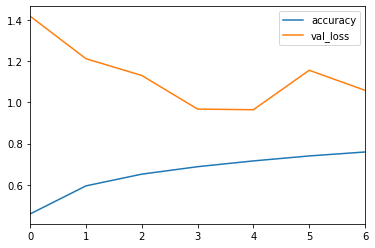

In [54]:
metrics[['accuracy', 'val_loss']].plot()

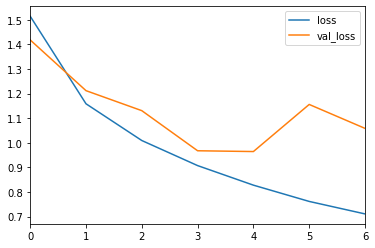

In [55]:
metrics[['loss', 'val_loss']].plot()

In [56]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0584961903572083, 0.6713]

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
predictions = model.predict_classes(x_test)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      0.86      0.67      1000
           1       0.86      0.73      0.79      1000
           2       0.60      0.54      0.57      1000
           3       0.50      0.48      0.49      1000
           4       0.71      0.57      0.63      1000
           5       0.53      0.65      0.58      1000
           6       0.74      0.77      0.75      1000
           7       0.80      0.67      0.73      1000
           8       0.84      0.73      0.78      1000
           9       0.77      0.73      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



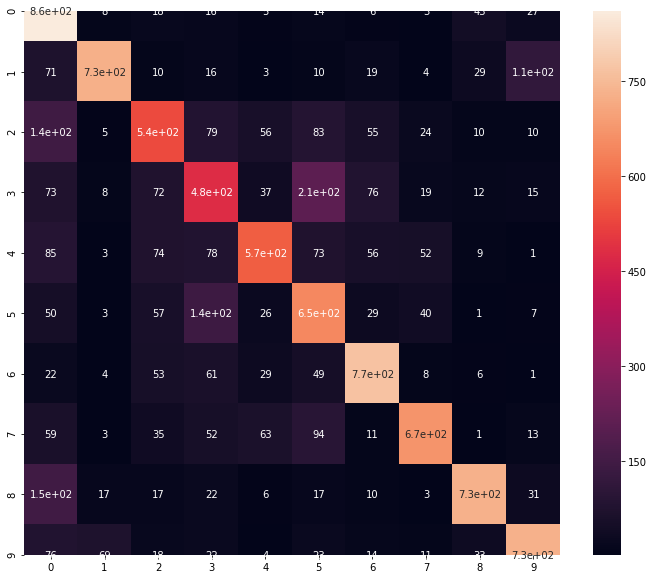

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot= True)

In [63]:
pre_img = x_test[0]

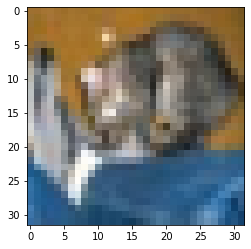

In [64]:
plt.imshow(pre_img)

In [65]:
y_test[0]

array([3], dtype=uint8)

In [66]:
model.predict_classes(pre_img.reshape(1,32,32,3))

array([3], dtype=int64)

In [67]:
# YAY IT PREDICTED CORRECTLY

In [ ]:
# :-)